# Null Ellipsometry

**Scott Prahl**

*April 2020*

References

* Archer, *Manual on Ellipsometry* 1968.
* Azzam, *Ellipsometry and Polarized Light*, 1977.
* Fujiwara, *Spectroscopic Ellipsometry*, 2007.
* [McCrackin, "Measurement of the Thickness and Refractive Index of Very Thin Films and the Optical Properties of Surfaces by Ellipsometry," *J. of the National Bureau of Standards*, **67A**, 363–377, 1963.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5317232/)
* Tompkins, *A User's Guide to Ellipsometry*, 1993
* Tompkins, *Handbook of Ellipsometry*, 2005.
* Woollam, *A Short Course in Ellipsometry*, 2001.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pypolar.jones as jones
import pypolar.fresnel as fresnel
import pypolar.visualization as vis
import pypolar.ellipsometry as ell

m_bk7 = 1.5151  # index of BK7 at 632.8nm
m_si = 3.875 - 0.023j #index of crystalline silicon at 632.8nm


In [2]:
m = np.array([1+1j,1.5,1j])
d = np.array([2+2j,3+3j,4+4j])

data = np.where([True, False, True], [11, 21, 46], [19, 29, 18])
print(data)
dd = np.conjugate(d)
mask = m.imag == 0
print(mask)
print(d)
print(dd)
np.where(m.imag == 0, np.conjugate(d), d)

[11 29 46]
[False  True False]
[2.+2.j 3.+3.j 4.+4.j]
[2.-2.j 3.-3.j 4.-4.j]


array([2.+2.j, 3.-3.j, 4.+4.j])

## Null Ellipsometry

### Layout

<img src="https://omlc.org/~prahl/host/453/week4/pca.png" width="70%">

A typical layout for a null ellipsometer is shown above.  An unpolarized (or circularly polarized) laser beam is incident on a linear polarizer set at an angle $\theta_p$.  The light then passes through a quarter wave plate (QWP) set at ±45° to the plane of incidence.  The light emerging from the polarizer will in general be elliptically polarized.  This light hits the sample and the reflected light passes through an analyzer (at $\theta_a$) before reaching the detector.

In null ellipsometry, the polarizer and analyzer are rotated until no light reaches the detector.  These angles are used to determine $\tan\psi$ and $\Delta$, which in turn, are used to calculate the complex refractive index of the sample.

It is not readily obvious that the combination of linear polarizer can produce any elliptical state desired.  Below shows five different polarization states as the linear polarizer is rotated relative to the QWP.

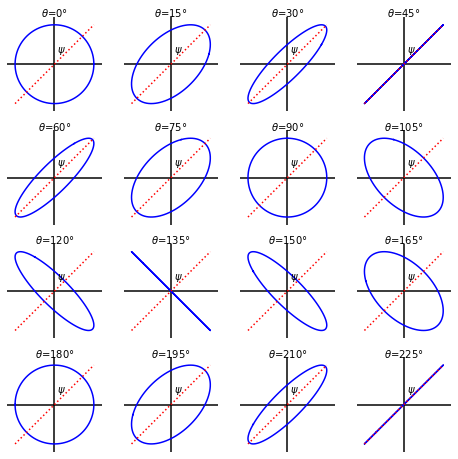

In [3]:
qwp = jones.op_quarter_wave_plate(np.pi/4)

plt.subplots(4,4,figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    th = 15*i
    theta = np.radians(th)
    pol = jones.field_linear(theta)
    result = qwp @ pol
    vis.draw_jones_ellipse(result, simple=True)
    plt.xticks([])
    plt.yticks([])
    plt.text(0,0.85,r"$\theta$=%d°"%th,ha='center')

### Ellipsometry Zones

McCrackin summarizes

>For any given surface there is a multiplicity of
polarizer, analyzer, and compensator scale settings
that produce extinction by the analyzer of the
reflected light from the surface, and it becomes
somewhat of a problem to determine the values of
$\Delta$ and $\psi$ from these various readings. In order to
explain how these numerous readings arise and how
$\Delta$ and $\psi$ may be computed from them it is well to
keep two facts in mind: (a) all azimuthal angles are
measured positive counter-clockwise from the plane
of incidence when looking into the light beam, and
(b) the compensator, which may be set at any azimuth,
is generally set so that its fast axis is in an
azimuth of $\pm\pi/4$...

>The various readings fall into four sets called
zones, two with the fast axis of the compensator set
at $\pi/4$, numbered 2 and 4, and two with it set at
$-\pi/4$, numbered 1 and 3. In each zone there is
one independent set of polarizer and analyzer readings,
making four independent sets of $\theta_p$ and $\theta_a$
readings in all. However, since both analyzer and
polarizer may be rotated by $\pi$ without affecting the
results, there are 16 polarizer and analyzer settings
falling into four independent zones. Since the
compensator may also be rotated by $\pi$ without
affecting the results, there are 32 possible sets of
readings on the ellipsometer.


The various null angles fall into four sets called zones, two with the fast-axis
of the quarter wave plate set 45° (2 & 4) and two with the fast-axis of the
quarter wave plate set to -45° (1 & 3).  In each zone there are four combinations
of polarizer and analyzer angles that have a null reading (because rotation of a
linear polarizer by 180° should give the same result.  Identifying the right values to 
determine $\psi$ and $\Delta$ is confusing so
McCrackin introduces three new parameters ($p$, $a_s$, and $a_p$) to simplify
    
>Rather than calculating $\Delta$ and $\psi$ directly from the
$\theta_p$ and $\theta_a$ values, it is useful to calculate three other
quantities, $p$, $a_p$, and $a_s$, from the $\theta_p$ and $\theta_a$ values,
$p$ being related to the $\theta_p$ readings, $a_p$, related to the
$\theta_a$ readings in zones 1 and 4, and $a_s$, related to the
$\theta_a$ readings in zones 2 and 3. For a perfect quarterwave
plate these are related to $\Delta$ and $\psi$ by

| Zone  |  QWP Orientation  | Polarizer Angle $\theta_p$  |  Analyzer Angle $\theta_p$   |
|:-----:|:-------------:|:----------|:--------|
| 1     |    $-\pi/4$      | $p$        | $a_p$      |
|       |                  | $p+\pi$    | $a_p$      |
|       |                  | $p$        | $a_p+\pi$  |
|       |                  | $p+\pi$    | $a_p+\pi$  |
|       |                  |            |            |
| 3     |    $-\pi/4$      | $p+ \pi/2$ | $ \pi-a_s$ |
|       |                  | $p+3\pi/2$ | $ \pi-a_s$ |
|       |                  | $p+ \pi/2$ | $2\pi-a_s$ |
|       |                  | $p+3\pi/2$ | $2\pi-a_s$ |
|       |                  |            |            |
| 2     |    $+\pi/4$      | $ \pi/2-p$ | $a_s$      |
|       |                  | $3\pi/2-p$ | $a_s$      |
|       |                  | $ \pi/2-p$ | $a_s+\pi$  |
|       |                  | $3\pi/2-p$ | $a_s+\pi$  |
|       |                  |            |            |
| 4     |    $+\pi/4$      | $ \pi-p$   | $ \pi-a_p$ |
|       |                  | $2\pi-p$   | $ \pi-a_p$ |
|       |                  | $ \pi-p$   | $2\pi-a_p$ |
|       |                  | $2\pi-p$   | $2\pi-a_p$ |

So for an ellipsometer with the QWP at 45°, there are eight different polarizer/analyzer pairs that will null the reflected light.  The $\psi$ and $\Delta$ values are readily calculated from these using:

$$
\Delta = \frac{\pi}{2} +2p
\qquad\mbox{and}\qquad
\psi=a_s = a_p
$$


When the QWP is oriented 45° to the plane of incidence then zones 2 and 4 are of interest.  Of the four possible polarizer/analyzer pairs, the first entry for zone 2 and the last entry in zone 4 can be used.  

We know that $0\le\psi\le\pi/2$ and that $0\le\Delta\le2\pi$ and use these to derive constraints for range of polarizer and analyzer angles for each zone.  These are show graphically below.

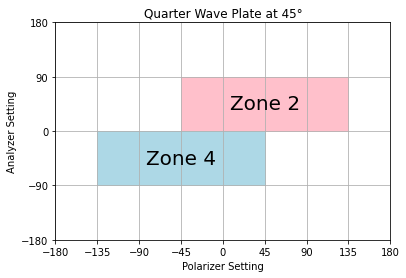

In [4]:
plt.xlim(-180,180)
plt.ylim(-180,180)
plt.xticks([-180,-135,-90,-45,0,45,90,135,180])
plt.yticks([-180,-90,0,90,180])

plt.axhspan(0,90,3/8,7/8,color='pink')
plt.text(45,45,"Zone 2",fontsize=20,ha='center',va='center')

plt.axhspan(0,-90,1/8,5/8,color='lightblue')
plt.text(-45,-45,"Zone 4",fontsize=20,ha='center',va='center')

plt.xlabel("Polarizer Setting")
plt.ylabel("Analyzer Setting")
plt.title("Quarter Wave Plate at 45°")
plt.grid(True)

plt.show()

#### Zone 2

We know that $0\le\psi\le\pi/2$ and that $0\le\Delta\le2\pi$.  Therefore with a bit of algebra, the first row of zone 2 leads to the requirement that the analyzer must be between 0° and 90°:

$$
0°<\theta_{a2}<90° \quad\mbox{and}\quad -45°<\theta_{p2}\le135°
$$

when **both** conditions are satisfied, then

$$
\psi = \theta_{a2} \quad\mbox{and}\quad \Delta = 270°-2\theta_{p2} 
$$

Notice that when $\theta_{p2}=135°$ then $\Delta=0$; this means that the index of refraction has no imaginary part and is a real number.

#### Zone 4

For zone 4, the last row in Table 1 requires the analyzer to be between -90° and 0°

$$
-90°<\theta_{a4}<0° \quad\mbox{and}\quad -135°<\theta_{p4}\le45°
$$

when **both** conditions are satisfied, then

$$
\psi = -\theta_{a4} \quad\mbox{and}\quad \Delta = 90°-2\theta_{p4}
$$

Now when $\theta_{p4}=45°$ then $\Delta=0$; this means that the index of refraction is again purely real.

#### Averaging results from zone 2 and zone 4

Since $\psi$ and $\Delta$ are the same for both zones this means that
$$
\theta_{a2} = - \theta_{a4} \qquad\mbox{and}\qquad \theta_{p2} = 90° + \theta_{p4}
$$

McCrakin showed that the averaging $\psi$ and $\Delta$ from zones 2 and 4 should eliminate errors due to inexact compensation by the QWP.  

## BK7

Consider incidence angles both less than and greater than the Brewster's angle.  We see that the phase change for angles below Brewster's angle have $\Delta=180°$ and we have $\exp(-j \pi)=-1$ and there is a sign change in the Fresnel reflection but the overall index of refraction remains real.

Above Brewster's angle $\Delta=0°$ and the Fresnel reflection is positive and real.  In the figure below Brewster's angle is shown in red.  The two dotted blue lines are the fixed ellipsometer incidence angles of 50° and 70°.

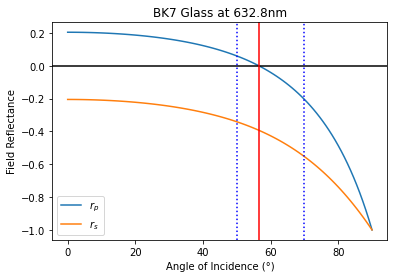

In [5]:
angle = np.linspace(0,90,100)
brew = np.degrees(np.arctan(m_bk7))

rp = fresnel.r_par_amplitude(m_bk7, np.radians(angle))
rs = fresnel.r_per_amplitude(m_bk7, np.radians(angle))

plt.plot(angle,rp,label='$r_p$')
plt.plot(angle,rs,label='$r_s$')
plt.axhline(0,color='black')
plt.axvline(50,color='blue',linestyle=':')
plt.axvline(70,color='blue',linestyle=':')
plt.axvline(brew,color='red')


plt.xlabel('Angle of Incidence (°)')
plt.ylabel('Field Reflectance')
plt.title('BK7 Glass at 632.8nm')
plt.legend()
plt.show()

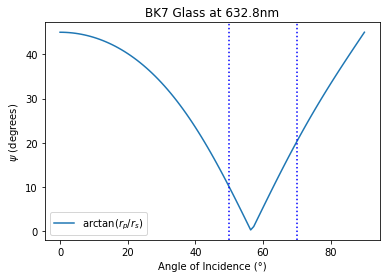

In [6]:
plt.plot(angle,np.degrees(np.arctan(np.abs(rp/rs))),label='arctan($r_p/r_s$)')
plt.axvline(50,color='blue',linestyle=':')
plt.axvline(70,color='blue',linestyle=':')

plt.xlabel('Angle of Incidence (°)')
plt.ylabel('$\psi$ (degrees)')
plt.title('BK7 Glass at 632.8nm')
plt.legend()
plt.show()

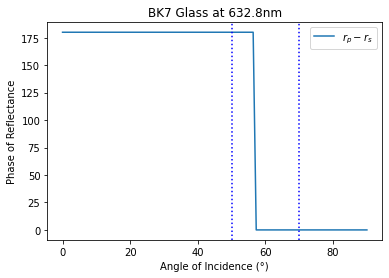

In [7]:
plt.plot(angle,np.degrees(np.angle(rs)-np.angle(rp)),label='$r_p-r_s$')
plt.axvline(50,color='blue',linestyle=':')
plt.axvline(70,color='blue',linestyle=':')

plt.xlabel('Angle of Incidence (°)')
plt.ylabel('Phase of Reflectance')
plt.title('BK7 Glass at 632.8nm')
plt.legend()
plt.show()

### Expected ellipsometer angles

In [8]:
theta_i = np.radians(50)
s = ell.null_angles_report(m_bk7, theta_i)
print(s)

m       = 1.5151+0.0000j
theta_i =    50.0°

zone  P   theta_a
  1      0.8°      0.2°
  1      3.9°      0.2°
  1      0.8°      3.3°
  1      3.9°      3.1°

  3      2.4°      3.0°
  3      5.5°      3.0°
  3      2.4°      6.1°
  3      5.5°      6.1°

  2      0.8°      0.2°
  2      3.9°      0.2°
  2      0.8°      3.3°
  2      3.9°      3.3°

  4      2.4°      3.0°
  4      5.5°      3.0°
  4      2.4°      6.1°
  4      5.5°      6.1°

p       =    45.0°
a       =    10.1°

psi     =    10.1°
Delta   =   180.0°




In [9]:
theta_i = np.radians(70)
s = ell.null_angles_report(m_bk7, theta_i)
print(s)

m       = 1.5151+0.0000j
theta_i =    70.0°

zone  P   theta_a
  1      5.5°      0.4°
  1      2.4°      0.4°
  1      5.5°      3.5°
  1      2.4°      3.1°

  3      0.8°      2.8°
  3      3.9°      2.8°
  3      0.8°      5.9°
  3      3.9°      5.9°

  2      2.4°      0.4°
  2      5.5°      0.4°
  2      2.4°      3.5°
  2      5.5°      3.5°

  4      3.9°      2.8°
  4      0.8°      2.8°
  4      3.9°      5.9°
  4      0.8°      5.9°

p       =   -45.0°
a       =    20.3°

psi     =    20.3°
Delta   =     0.0°




### Measured Ellipsometer angles

In [10]:
theta_i = np.radians(50)
P2 = np.radians(45)
A2 = np.radians(9.5)
rho2 = ell.rho_from_zone_2_null_angles(P2,A2)
m2 = ell.m_from_rho(rho2,theta_i)

P4 = np.radians(315.0-360)
A4 = np.radians(348.7-360)
rho4 = ell.rho_from_zone_4_null_angles(P4,A4)
m4 = ell.m_from_rho(rho4,theta_i)
m = (m2+m4)/2

print("Incidence   = %6.1f°" % np.degrees(theta_i))
print("Measured P2 = %6.1f°" % np.degrees(P2))
print("Measured A2 = %6.1f°" % np.degrees(A2))
print("Measured P4 = %6.1f°" % np.degrees(P4))
print("Measured A4 = %6.1f°" % np.degrees(A4))
print()
print("Derived index of refraction")
print("%.3f%+.3fj (zone 2)"%(m2.real,m2.imag))
print("%.3f%+.3fj (zone 4)"%(m4.real,m4.imag))
print("%.3f%+.3fj (average)"%(m.real,m.imag))

Incidence   =   50.0°
Measured P2 =   45.0°
Measured A2 =    9.5°
Measured P4 =  -45.0°
Measured A4 =  -11.3°

Derived index of refraction
1.492-0.000j (zone 2)
1.569-0.000j (zone 4)
1.530-0.000j (average)


In [11]:
theta_i = np.radians(70)
P2 = np.radians(135)
A2 = np.radians(19)
rho2 = ell.rho_from_zone_2_null_angles(P2,A2)
m2 = ell.m_from_rho(rho2,theta_i)

P4 = np.radians(45)
A4 = np.radians(-20.1)
rho4 = ell.rho_from_zone_4_null_angles(P4,A4)
m4 = ell.m_from_rho(rho4,theta_i)

print("Incidence   = %6.1f°" % np.degrees(theta_i))
print("Measured P2 = %6.1f°" % np.degrees(P2))
print("Measured A2 = %6.1f°" % np.degrees(A2))
print("Measured P4 = %6.1f°" % np.degrees(P4))
print("Measured A4 = %6.1f°" % np.degrees(A4))
print()
print("Derived index of refraction")
print("%.3f%+.3fj (zone 2)"%(m2.real,m2.imag))
print("%.3f%+.3fj (zone 4)"%(m4.real,m4.imag))
print("%.3f%+.3fj (average)"%(m.real,m.imag))

Incidence   =   70.0°
Measured P2 =  135.0°
Measured A2 =   19.0°
Measured P4 =   45.0°
Measured A4 =  -20.1°

Derived index of refraction
1.571+0.000j (zone 2)
1.523+0.000j (zone 4)
1.530-0.000j (average)


## Crystalline Silicon

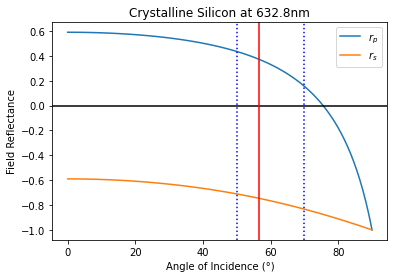

In [12]:
angle = np.linspace(0,90,100)
brew = np.degrees(np.arctan(m_bk7))

rp = fresnel.r_par_amplitude(m_si, np.radians(angle))
rs = fresnel.r_per_amplitude(m_si, np.radians(angle))

plt.plot(angle,rp.real,label='$r_p$')
plt.plot(angle,rs.real,label='$r_s$')
plt.axhline(0,color='black')
plt.axvline(50,color='blue',linestyle=':')
plt.axvline(70,color='blue',linestyle=':')
plt.axvline(brew,color='red')


plt.xlabel('Angle of Incidence (°)')
plt.ylabel('Field Reflectance')
plt.title('Crystalline Silicon at 632.8nm')
plt.legend()
plt.show()

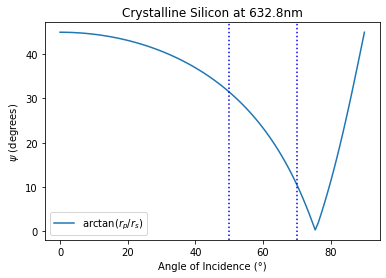

In [13]:
plt.plot(angle,np.degrees(np.arctan(np.abs(rp/rs))),label='arctan($r_p/r_s$)')
plt.axvline(50,color='blue',linestyle=':')
plt.axvline(70,color='blue',linestyle=':')

plt.xlabel('Angle of Incidence (°)')
plt.ylabel('$\psi$ (degrees)')
plt.title('Crystalline Silicon at 632.8nm')

plt.legend()
plt.show()

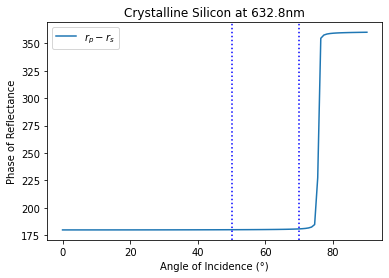

In [14]:
plt.plot(angle,np.degrees(np.angle(rs)-np.angle(rp)),label='$r_p-r_s$')
plt.axvline(50,color='blue',linestyle=':')
plt.axvline(70,color='blue',linestyle=':')

plt.xlabel('Angle of Incidence (°)')
plt.ylabel('Phase of Reflectance')
plt.title('Crystalline Silicon at 632.8nm')

plt.legend()
plt.show()

### Expected ellipsometer angles

In [15]:
theta_i = np.radians(50)
s = ell.null_angles_report(m_si, theta_i)
print("****Crystalline Silicon****\n\n",s)

****Crystalline Silicon****

 m       = 3.8750-0.0230j
theta_i =    50.0°

zone  P   theta_a
  1      0.8°      0.5°
  1      3.9°      0.5°
  1      0.8°      3.7°
  1      3.9°      3.1°

  3      2.4°      2.6°
  3      5.5°      2.6°
  3      2.4°      5.7°
  3      5.5°      5.7°

  2      0.8°      0.5°
  2      3.9°      0.5°
  2      0.8°      3.7°
  2      3.9°      3.7°

  4      2.4°      2.6°
  4      5.5°      2.6°
  4      2.4°      5.7°
  4      5.5°      5.7°

p       =    44.9°
a       =    31.5°

psi     =    31.5°
Delta   =   179.8°




In [16]:
theta_i = np.radians(70)
s = ell.null_angles_report(m_si, theta_i)
print("****Crystalline Silicon****\n\n",s)

****Crystalline Silicon****

 m       = 3.8750-0.0230j
theta_i =    70.0°

zone  P   theta_a
  1      0.8°      0.2°
  1      3.9°      0.2°
  1      0.8°      3.3°
  1      3.9°      3.1°

  3      2.3°      3.0°
  3      5.5°      3.0°
  3      2.3°      6.1°
  3      5.5°      6.1°

  2      0.8°      0.2°
  2      3.9°      0.2°
  2      0.8°      3.3°
  2      3.9°      3.3°

  4      2.4°      3.0°
  4      5.5°      3.0°
  4      2.4°      6.1°
  4      5.5°      6.1°

p       =    44.5°
a       =    10.5°

psi     =    10.5°
Delta   =   179.1°




### Measured Ellipsometer angles

In [17]:
theta_i = np.radians(50)
P2 = np.radians(42.2)
A2 = np.radians(32.1)
rho2 = ell.rho_from_zone_2_null_angles(P2,A2)
m2 = ell.m_from_rho(rho2,theta_i)

P4 = np.radians(316.5-360)
A4 = np.radians(328.5-360)
rho4 = ell.rho_from_zone_4_null_angles(P4,A4)
m4 = ell.m_from_rho(rho4,theta_i)
m = (m2+m4)/2

print("Incidence   = %6.1f°" % np.degrees(theta_i))
print("Measured P2 = %6.1f°" % np.degrees(P2))
print("Measured A2 = %6.1f°" % np.degrees(A2))
print("Measured P4 = %6.1f°" % np.degrees(P4))
print("Measured A4 = %6.1f°" % np.degrees(A4))
print()
print("Derived index of refraction")
print("%.3f%+.3fj (zone 2)"%(m2.real,m2.imag))
print("%.3f%+.3fj (zone 4)"%(m4.real,m4.imag))
print("%.3f%+.3fj (average)"%(m.real,m.imag))

Incidence   =   50.0°
Measured P2 =   42.2°
Measured A2 =   32.1°
Measured P4 =  -43.5°
Measured A4 =  -31.5°

Derived index of refraction
3.895-0.757j (zone 2)
3.837-0.379j (zone 4)
3.866-0.568j (average)


In [18]:
theta_i = np.radians(70)
P2 = np.radians(55.8)
A2 = np.radians(10.4)
rho2 = ell.rho_from_zone_2_null_angles(P2,A2)
m2 = ell.m_from_rho(rho2,theta_i)

P4 = np.radians(-34.2)
A4 = np.radians(-10.9)
rho4 = ell.rho_from_zone_4_null_angles(P4,A4)
m4 = ell.m_from_rho(rho4,theta_i)
m = (m2+m4)/2

print("Incidence   = %6.1f°" % np.degrees(theta_i))
print("Measured P2 = %6.1f°" % np.degrees(P2))
print("Measured A2 = %6.1f°" % np.degrees(A2))
print("Measured P4 = %6.1f°" % np.degrees(P4))
print("Measured A4 = %6.1f°" % np.degrees(A4))
print()
print("Derived index of refraction")
print("%.3f%+.3fj (zone 2)"%(m2.real,m2.imag))
print("%.3f%+.3fj (zone 4)"%(m4.real,m4.imag))
print("%.3f%+.3fj (average)"%(m.real,m.imag))

Incidence   =   70.0°
Measured P2 =   55.8°
Measured A2 =   10.4°
Measured P4 =  -34.2°
Measured A4 =  -10.9°

Derived index of refraction
3.722-0.488j (zone 2)
3.778-0.522j (zone 4)
3.750-0.505j (average)
